In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import healpy as hp
from astropy.io import fits
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from reproject import reproject_interp
from numpy.fft import fft, ifft
import scipy.fftpack
from scipy import ndimage as ndi

This is the large region of sky we inspected in Susan's PRL, from which we are going to extract a sub-section

In [2]:
#galfa_fn = "/Users/susanclark/GALFA_HI_W_smallregion_S1023_V-000.4kms.fits"
#galfa_fn = "/Users/jegpeek/Dropbox/GALFA-Planck/GALFA_HI_W_smallregion_S1023_V-000.4kms.fits"
galfa_fn = "/Users/jegpeek/Dropbox/GALFA-Planck/Big_Files/SC_241.66_28.675.best_20.fits"
#galfa_fn = "/Volumes/jpdrive/DR2W/Wide/GALFA_HI_RA+DEC_180.00+26.35_W.fits"
ghdu = fits.open(galfa_fn)
#cubedata = ghdu[0].data
#cubedata = fits.getdata(galfa_fn)

In [3]:
ghdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5600                                                  
NAXIS2  =                 1150                                                  
OBJECT  = 'GALFA-HI RA+DEC Custom 241.660 +28.6700' /  Object name              
CTYPE1  = 'RA---CAR'                                            /  1st axis type
CRVAL1  =              180.000 /  Reference pixel value                         
CRPIX1  =              6499.50 /  Reference pixel                               
CDELT1  =           -0.0166667 /  Pixel size in world coordinate units          
CROTA1  =               0.0000 /  Axis rotation in degrees                      
CTYPE2  = 'DEC--CAR'                                            /  2nd axis type
CRVAL2  =              0.000

Now we show a 512x512 region that has pretty smooth b-fields. We might be able to find something better in the larger data set, but it's a start

(512, 512)


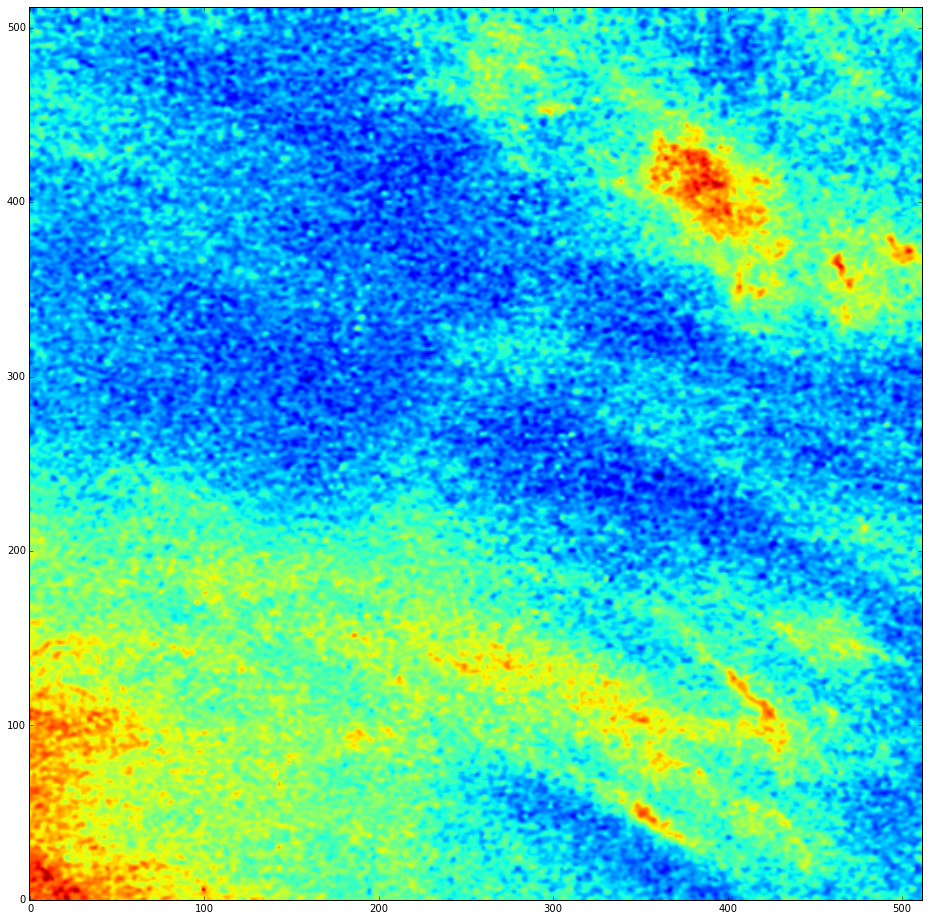

In [4]:
dx=512
img = ghdu[0].data[500:500+dx, 4800:4800+dx]
img = img - np.mean(img)
fig = plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.ylim(0, dx)
print img.shape

Now we generate the auto-correlation function...

In [5]:
img = np.asarray(img, np.float)
imgFT = scipy.fftpack.fft2(img)
imgAC = (scipy.fftpack.ifft2(imgFT * np.conjugate(imgFT))).real

And show it

(0, 512)

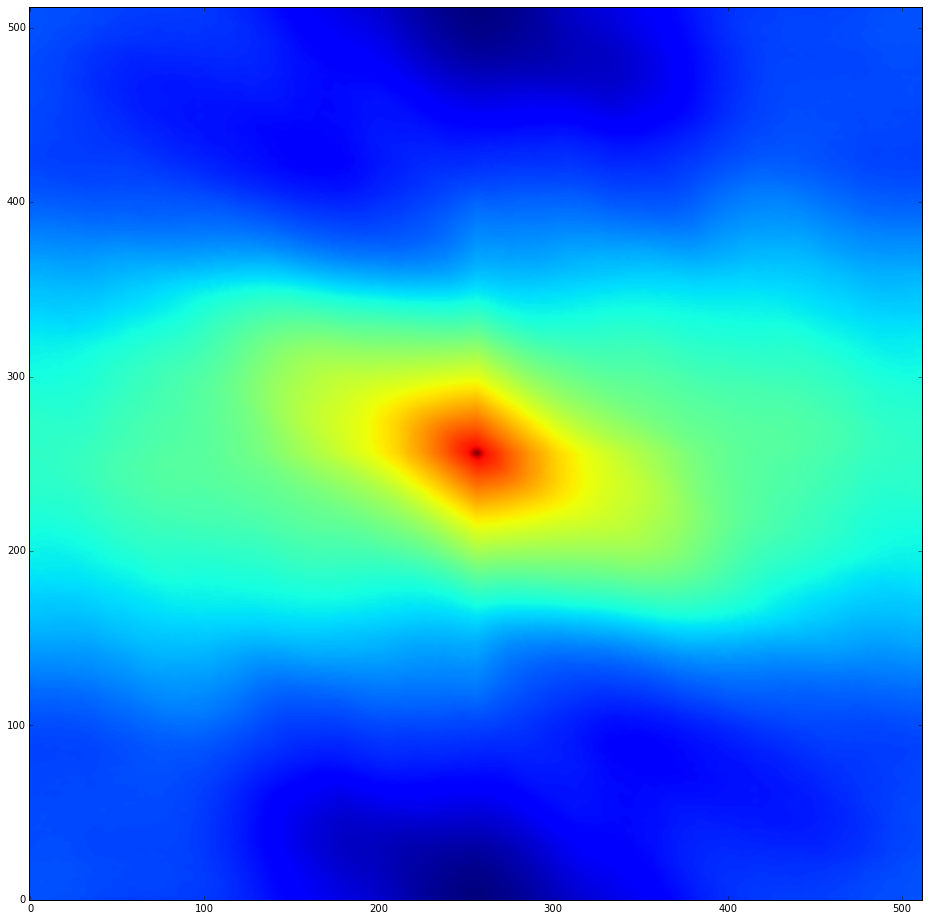

In [6]:
fig = plt.figure(figsize=(16, 16))
plt.imshow(np.roll(np.roll(imgAC, 256, axis=1), 256,axis=0))
plt.ylim(0, dx)

Followed by the structure function, which we call *SF*

(0, 512)

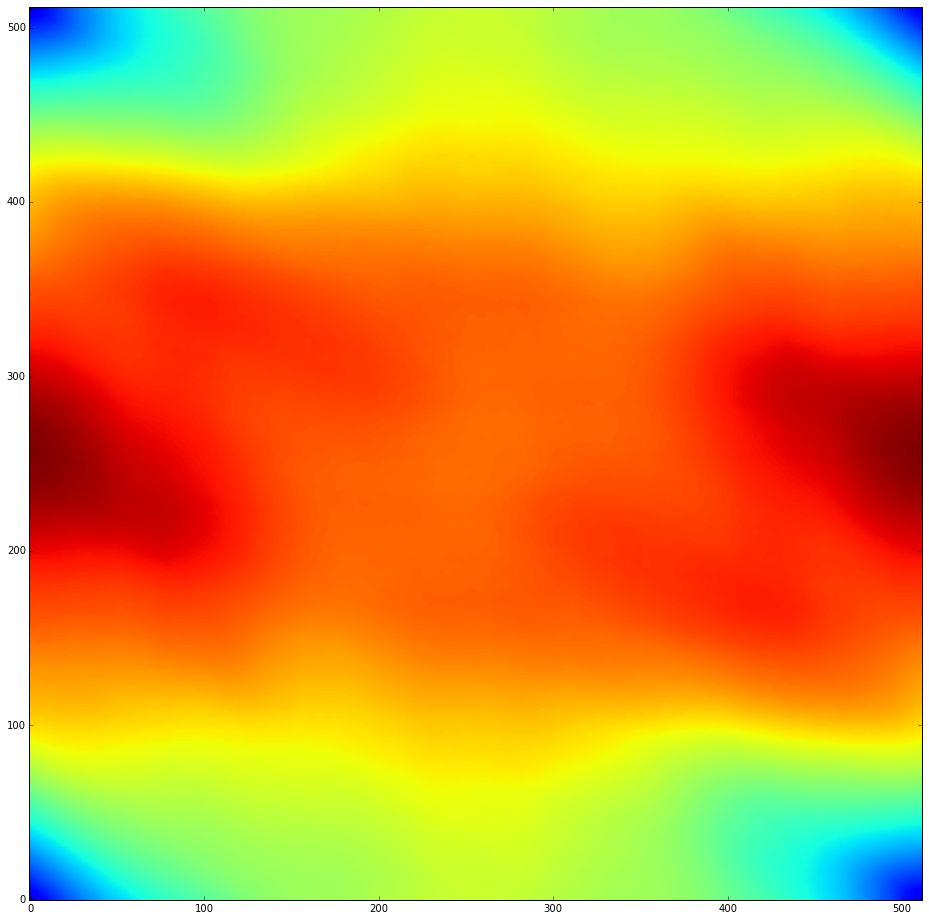

In [7]:
SF = 2*(np.mean(img**2)-imgAC )
fig = plt.figure(figsize=(16, 16))
plt.imshow(SF)
plt.ylim(0, dx)

Now we "roll" the structure function to be rougly aligned along the B-field. It's not a precise choice, but it pretty much works.


(0, 512)

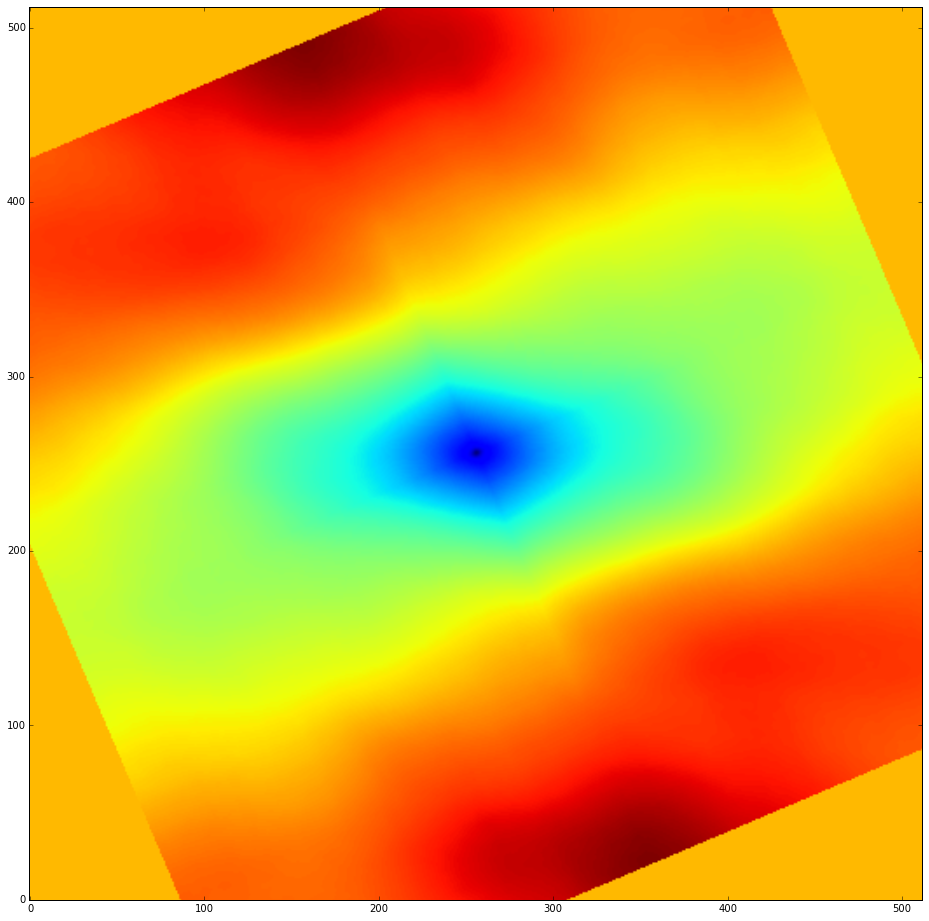

In [8]:
rollSF = np.roll(np.roll(SF, 256, axis=1), 256,axis=0)
rotrollSF = ndi.interpolation.rotate(rollSF, -23, reshape=False)
rotSF=np.roll(np.roll(rotrollSF, 256, axis=1), 256,axis=0)
fig = plt.figure(figsize=(16, 16))
plt.imshow(rotrollSF)
plt.ylim(0, dx)

and then plot the structure function along the X and Y axes.

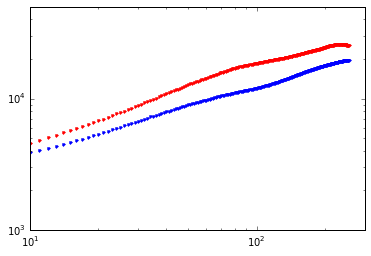

In [12]:
plt.plot(rotSF[0:256,0]-np.min(rotSF), '.', color='red')
plt.plot(rotSF[0,0:256]-np.min(rotSF), '.', color='blue')
plt.ylim(10**3, 5*10**4)
plt.xlim(10, 300)
plt.loglog()
plt.show()

These seem different from each other, but not as steep as Cho and Lazarian 2003, figure eg. What do you think? One thing to keep in mind is that we have a very noisy image here, which will tend to flatten everything. So maybe we need to pick a view with higher SNR (lower latitude? Thicker slices? Deeper integrations?) or try to account for the effects of radiometer noise.

https://www.dropbox.com/s/6fv42geu2kkh8gk/Screenshot%202015-12-03%2010.44.04.png?dl=0 (Cho and Lazarian figure 3 for quick reference)